# 0.0 Imports

In [86]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.0 Data Collection

### Database connection

In [27]:
# host = "comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com"
# port = 5432
# database = "comunidadedsdb"
# username = "member"
# password = "cdspa"

# conn = psycopg2.connect(
#             host=host,
#             port=port,
#             database=database,
#             user=username,
#             password=password
#         )

# cursor = conn.cursor()

### Getting existing tables from 'pa004' schema

In [35]:
# cursor.execute(
#     "SELECT tablename FROM pg_catalog.pg_tables WHERE schemaname NOT IN ('pg_catalog', 'information_schema', 'public');"
# )

# rows = cursor.fetchall()

# for row in rows:
#     print(row[0])

users
vehicle
insurance


### Getting all data from 'users' table

In [54]:
# cursor.execute(
#     "SELECT * FROM pa004.insurance LIMIT 5"
# )

In [55]:
# for row in cursor.fetchall():
#     print(row)

### Getting tables as Pandas Dataframes

In [52]:
# df_users = pd.read_sql("SELECT * FROM pa004.users", conn)
# df_vehicle = pd.read_sql("SELECT * FROM pa004.vehicle", conn)
# df_insurance = pd.read_sql("SELECT * FROM pa004.insurance", conn)

In [53]:
# df_users.to_csv("./data/users.csv")
# df_vehicle.to_csv("./data/vehicle.csv")
# df_insurance.to_csv("./data/insurance.csv")

# 2.0 Data Loading

In [2]:
df_users = pd.read_csv("../data/users.csv")
df_users.drop("Unnamed: 0", axis=1, inplace=True)

df_vehicle = pd.read_csv("../data/vehicle.csv")
df_vehicle.drop("Unnamed: 0", axis=1, inplace=True)

df_insurance = pd.read_csv("../data/insurance.csv")
df_insurance.drop("Unnamed: 0", axis=1, inplace=True)

df_raw = pd.merge(pd.merge(df_users, df_vehicle, on='id'), df_insurance, on='id')

# 3.0 Data description and data cleaning

In [4]:
df1 = df_raw.copy()

## Data Dictionary

* <b> Id  </b> - Unique ID for the customer
* <b> Gender </b>  - Gender of the customer
* <b> Age </b> 	- Age of the customer
* <b> Driving_License </b>  - 0 : Customer does not have DL, 1 : Customer already has DL
* <b> Region_Code </b>  - Unique code for the region of the customer
* <b> Previously_Insured </b>  - 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
* <b> Vehicle_Age </b>  - Age of the Vehicle
* <b> Vehicle_Damage </b>  - 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
* <b> Annual_Premium </b>  - The amount customer needs to pay as premium in the year
* <b> Policy_Sales_Channel </b>  - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* <b> Vintage </b>  - Number of Days, Customer has been associated with the company
* <b> Response </b>  - 1 : Customer is interested, 0 : Customer is not interested

## 3.1 Data dimension

In [5]:
shape = df1.shape
print(f'Number of rows: {shape[0]}')
print(f'Number of columns: {shape[1]}')

Number of rows: 381109
Number of columns: 12


## 3.2 Data types

In [6]:
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

* We don't need to make any datatype changes.

## 3.3 Missing data

In [7]:
df1.isnull().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

* No missing data.

## 3.4 Duplicates

## 3.5 Descriptive statistics

### 3.4.1 Numeric and categoric attributes

In [22]:
cat_columns = ['gender', 'region_code', 'policy_sales_channel', 'driving_license', 'vehicle_age', 
               'vehicle_damage', 'previously_insured', 'response']

num_columns = ['age', 'annual_premium', 'vintage']

In [23]:
cat_attributes = df1[cat_columns]
num_attributes = df1[num_columns]

### 3.4.2 Numeric attributes

#### Central Tendency

In [36]:
central_tendency = num_attributes.describe().loc[['mean', '50%']].T
central_tendency.rename(columns={'50%':'median'}, inplace=True)

#### Dispersion measures

In [43]:
dispersion = num_attributes.describe().loc[['min', 'max', 'std']].T
dispersion['range'] = dispersion.apply(lambda x: x['max'] - x['min'], axis=1)

#### Quantiles

In [44]:
quantiles = num_attributes.describe().loc[['25%', '75%']].T

#### Skewness & Kurtosis

In [50]:
skewness_kurtosis = pd.DataFrame()
skewness_kurtosis['skewness'] = num_attributes.apply(lambda x: x.skew())
skewness_kurtosis['kurtosis'] = num_attributes.apply(lambda x: x.kurtosis())

#### All metrics

In [91]:
numeric_metrics = pd.concat([central_tendency, dispersion, quantiles, skewness_kurtosis], axis=1)
numeric_metrics.reset_index(inplace=True)
numeric_metrics.rename(columns={'index':'attributes'}, inplace=True)
numeric_metrics = numeric_metrics[['attributes', 'mean', '25%', 'median', '75%', 'min', 'max', 'range', 'std', 'skewness', 'kurtosis']]

In [92]:
numeric_metrics

,attributes,mean,25%,median,75%,min,max,range,std,skewness,kurtosis
0,age,38.822584,25.0,36.0,49.0,20.0,85.0,65.0,15.511611,0.672539,-0.565655
1,annual_premium,30564.389581,24405.0,31669.0,39400.0,2630.0,540165.0,537535.0,17213.155057,1.766087,34.004569
2,vintage,154.347397,82.0,154.0,227.0,10.0,299.0,289.0,83.671304,0.003030,-1.200688


* annual_premium - o valor máximo é 540.000, enquanto o percentil 75 é 39.400, exibindo uma grande discrepância. Possivelmente essa variável possui outliers, que serão investigados posteriormente.

* annual_premium - um kurtosis de 34 indica que essa distribuição é extremamente empinada em relação a distribuição normal. Isso significa que os valores se concentram muito perto da média e que as caudas são pesadas,  o que significa que há uma alta probabilidade de valores extremos ou outliers.

### 3.4.3 Categoric attributes

#### Nº of categories for each cat col

In [136]:
cat_attributes.apply(lambda x: x.nunique())

gender                    2
region_code              53
policy_sales_channel    155
driving_license           2
vehicle_age               3
vehicle_damage            2
previously_insured        2
response                  2
dtype: int64

#### Frequency for each cat col

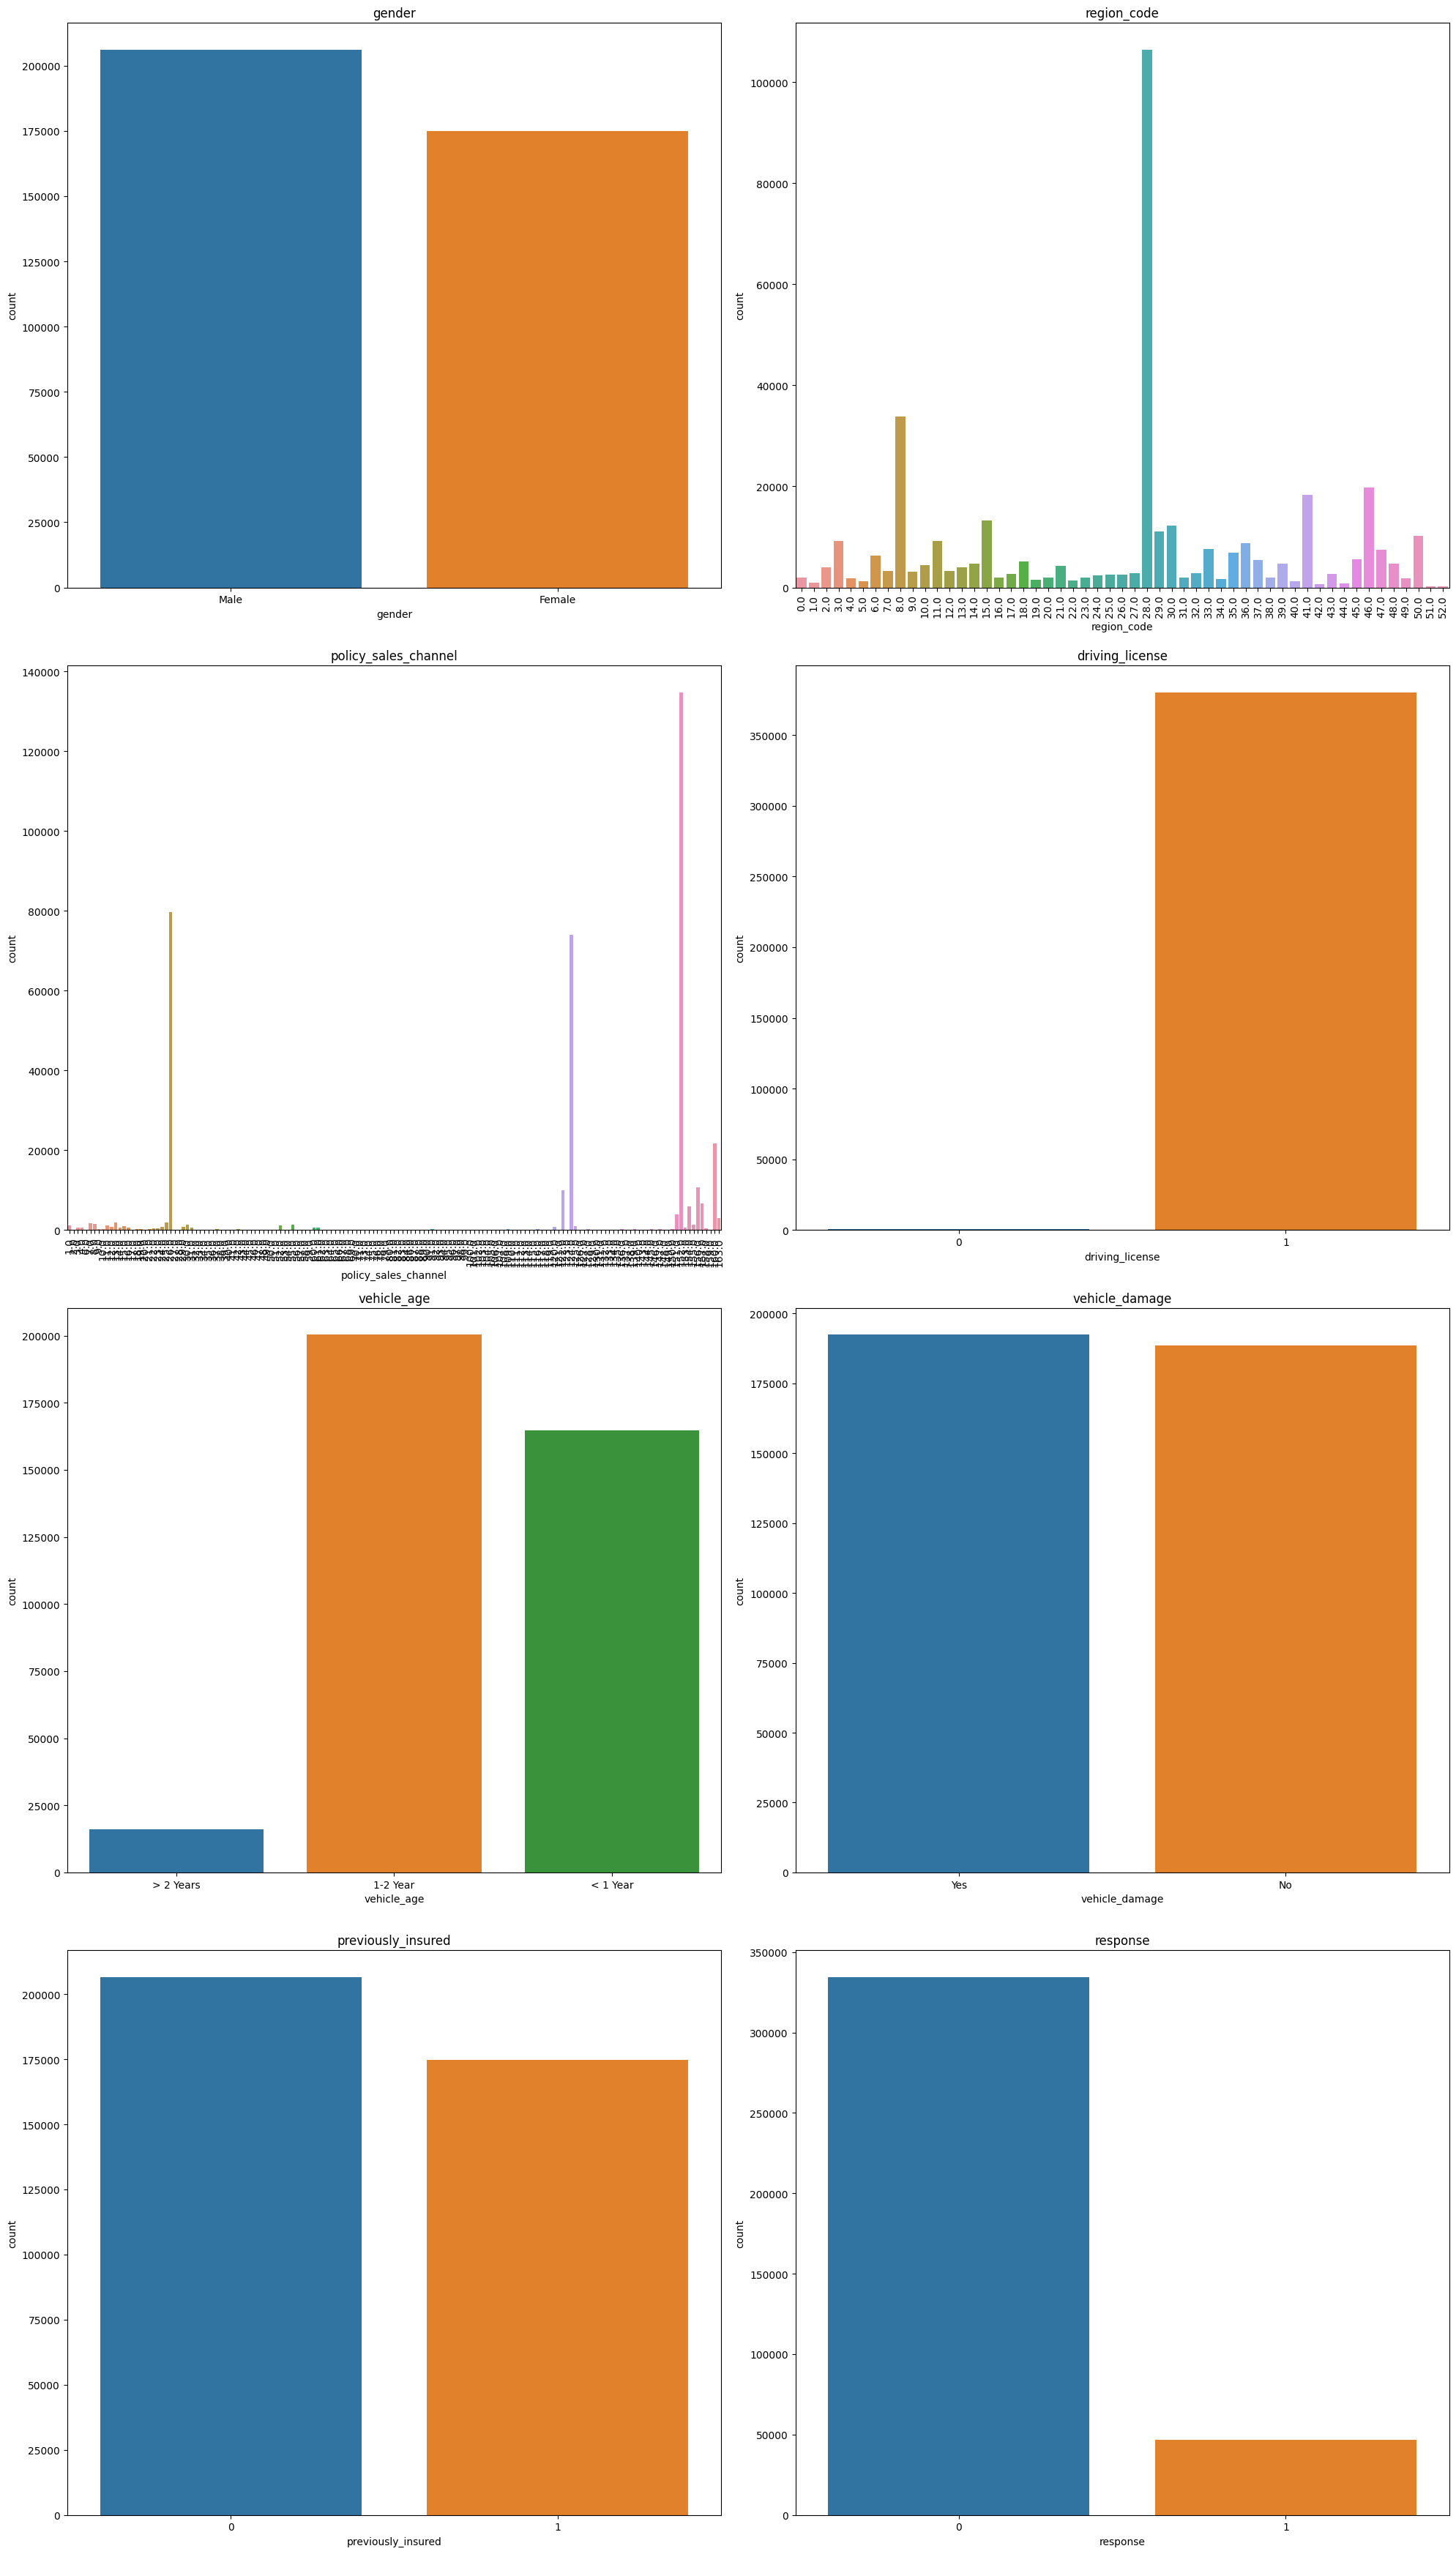

In [135]:
#quanto tem de cada categoria
fig, axes = plt.subplots(b
                         nrows=4, ncols=2, figsize=(20, 35))

# Loop através das colunas do dataframe e plotagem dos gráficos
for i, column in enumerate(cat_attributes.columns):
    row = i // 2
    col = i % 2
    plot = sns.countplot(data=df1, x=column, ax=axes[row, col])
    axes[row, col].set_title(column)
    
    num_categories = len(df1[column].unique())
    if num_categories > 50:
        # Rotaciona as labels em 90 graus
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        
# Exibição dos gráficos
plt.tight_layout()
plt.show()

#### Frequency for each cat col according to 'response'

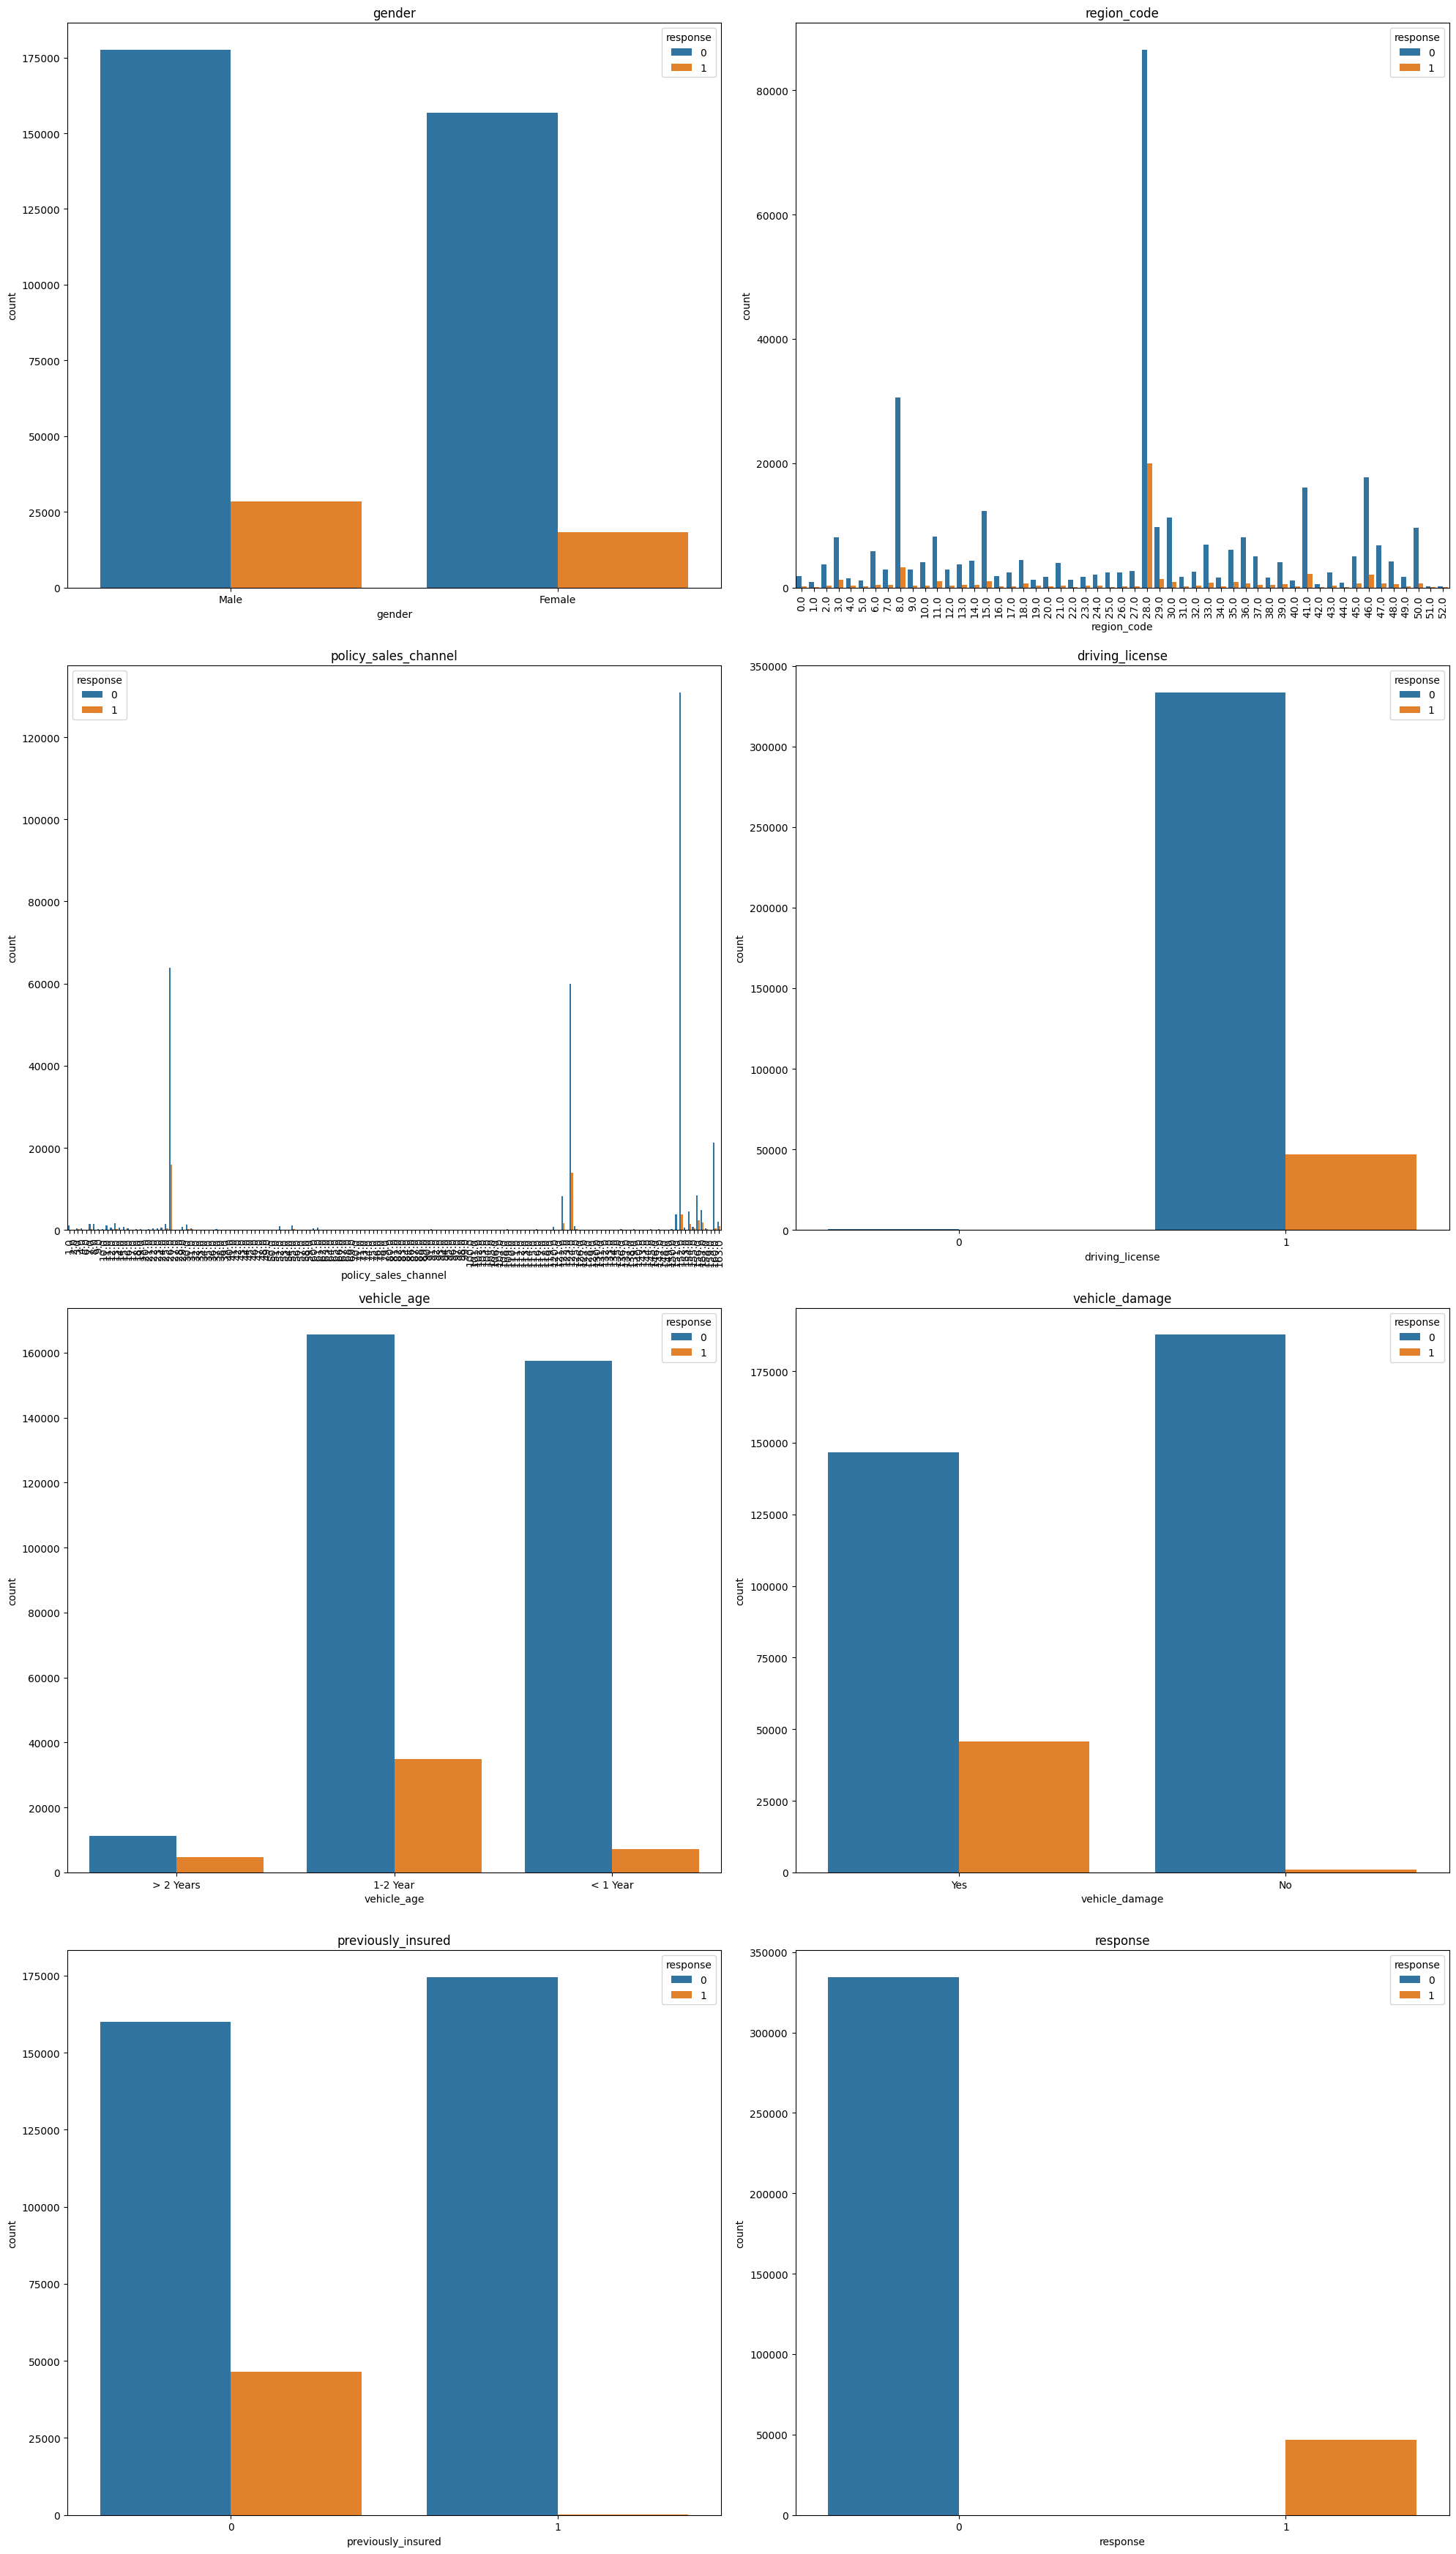

In [137]:
#quanto tem de cada categoria de acordo com a variável resposta
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 35))

# Loop através das colunas do dataframe e plotagem dos gráficos
for i, column in enumerate(cat_attributes.columns):
    row = i // 2
    col = i % 2
    plot = sns.countplot(data=df1, x=column, hue='response', ax=axes[row, col])
    axes[row, col].set_title(column)
    
    num_categories = len(df1[column].unique())
    if num_categories > 50:
        # Rotaciona as labels em 90 graus
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        
# Exibição dos gráficos
plt.tight_layout()
plt.show()